In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cur_path = '/content/drive/MyDrive/Traffic_sing_custom_model/'

In [ ]:
os.chdir('/content/drive/MyDrive/Traffic_sing_custom_model/')

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 597M/612M [00:07<00:00, 63.8MB/s]
100% 612M/612M [00:07<00:00, 83.4MB/s]


In [ ]:
current_directory = os.getcwd()
print("Current directory:", current_directory)

Current directory: /content/drive/MyDrive/Traffic_sing_custom_model


In [ ]:
!unzip /content/drive/MyDrive/Traffic_sing_custom_model/gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [ ]:

for i in range(classes):
    path = os.path.join('/content/drive/MyDrive/Traffic_sing_custom_model/Train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
data.shape

(39209, 30, 30, 3)

In [ ]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 15s 8ms/step - loss: 1.9475 - accuracy: 0.4825 - val_loss: 0.4986 - val_accuracy: 0.8724
Epoch 2/15
981/981 [==============================] - 6s 6ms/step - loss: 0.7217 - accuracy: 0.7870 - val_loss: 0.2955 - val_accuracy: 0.9180
Epoch 3/15
981/981 [==============================] - 8s 8ms/step - loss: 0.4748 - accuracy: 0.8578 - val_loss: 0.1579 - val_accuracy: 0.9582
Epoch 4/15
981/981 [==============================] - 5s 6ms/step - loss: 0.3567 - accuracy: 0.8963 - val_loss: 0.1027 - val_accuracy: 0.9737
Epoch 5/15
981/981 [==============================] - 7s 7ms/step - loss: 0.3012 - accuracy: 0.9129 - val_loss: 0.1073 - val_accuracy: 0.9689
Epoch 6/15
981/981 [==============================] - 6s 6ms/step - loss: 0.2641 - accuracy: 0.9246 - val_loss: 0.0767 - val_accuracy: 0.9784
Epoch 7/15
981/981 [==============================] - 6s 6ms/step - loss: 0.2475 - accuracy: 0.9310 - val_loss: 0.1011 - val_accuracy: 0.9717
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


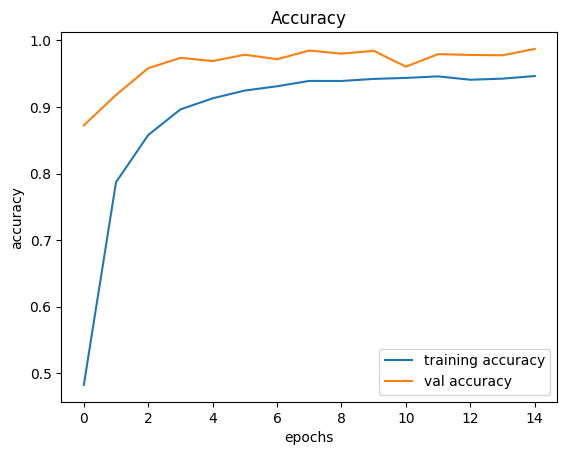

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

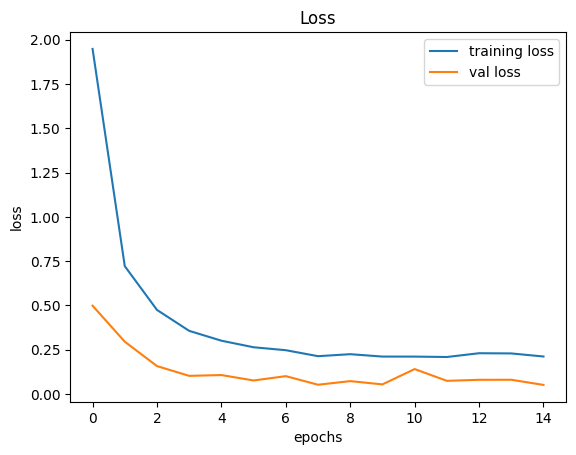

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Traffic_sign_classification/my_model.h5')

In [ ]:
from sklearn.metrics import accuracy_score

test_data_path = '/content/drive/MyDrive/Traffic_sing_custom_model/Test.csv'
test_data = pd.read_csv(test_data_path)

labels = test_data["ClassId"].values
imgs = test_data["Path"].values

data=[]

for img in imgs:
    image = Image.open('/content/drive/MyDrive/Traffic_sing_custom_model/' + img)
    image = image.resize((30,30))
    data.append(np.array(image))

model_path = '/content/drive/MyDrive/Traffic_sing_custom_model/my_model.h5'
X_test = np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(labels, pred)
print("Accuracy:", accuracy)

395/395 [==============================] - 1s 3ms/step
Accuracy: 0.9532066508313539
